# Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dijkstra_algorithm(graph, start, end):
    # Initialize distances with infinity for all nodes except start
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    
    # To store the paths
    previous_nodes = {node: None for node in graph}
    
    # Set of unvisited nodes
    unvisited_nodes = list(graph.keys())
    
    # For tracking the path and algorithm progress
    path_tracking = []
    
    while unvisited_nodes:
        # Find the unvisited node with minimum distance
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        
        # Store current state for visualization
        path_tracking.append({
            'current': current_node,
            'distances': distances.copy(),
            'unvisited': unvisited_nodes.copy()
        })
        
        # If we've reached the end or current distance is infinity, break
        if current_node == end or distances[current_node] == float('infinity'):
            break
            
        # Remove current node from unvisited
        unvisited_nodes.remove(current_node)
        
        # Check all neighbors of current node
        for neighbor, distance in graph[current_node].items():
            # Calculate potential new distance
            potential_distance = distances[current_node] + distance
            
            # If new distance is better, update
            if potential_distance < distances[neighbor]:
                distances[neighbor] = potential_distance
                previous_nodes[neighbor] = current_node
    
    # Reconstruct the path
    path = []
    current_node = end
    
    while current_node:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    
    # Reverse to get path from start to end
    path.reverse()
    
    return path, distances[end], path_tracking

### Graphing the Result 

Shortest Path: Origin -> Markham -> Destination
Total Distance: 75 km

Detailed Algorithm Steps:

Step 1:
Current Node: Origin
Distances: Origin: 0, Vaughan: ∞, Richmond Hill: ∞, Markham: ∞, North York: ∞, Destination: ∞, 
Remaining Unvisited Nodes: Origin, Vaughan, Richmond Hill, Markham, North York, Destination

Step 2:
Current Node: Vaughan
Distances: Origin: 0, Vaughan: 20, Richmond Hill: 30, Markham: 25, North York: ∞, Destination: ∞, 
Remaining Unvisited Nodes: Vaughan, Richmond Hill, Markham, North York, Destination

Step 3:
Current Node: Richmond Hill
Distances: Origin: 0, Vaughan: 20, Richmond Hill: 25, Markham: 25, North York: 55, Destination: ∞, 
Remaining Unvisited Nodes: Richmond Hill, Markham, North York, Destination

Step 4:
Current Node: Markham
Distances: Origin: 0, Vaughan: 20, Richmond Hill: 25, Markham: 25, North York: 45, Destination: ∞, 
Remaining Unvisited Nodes: Markham, North York, Destination

Step 5:
Current Node: North York
Distances: Origin: 0, Vaughan: 20,

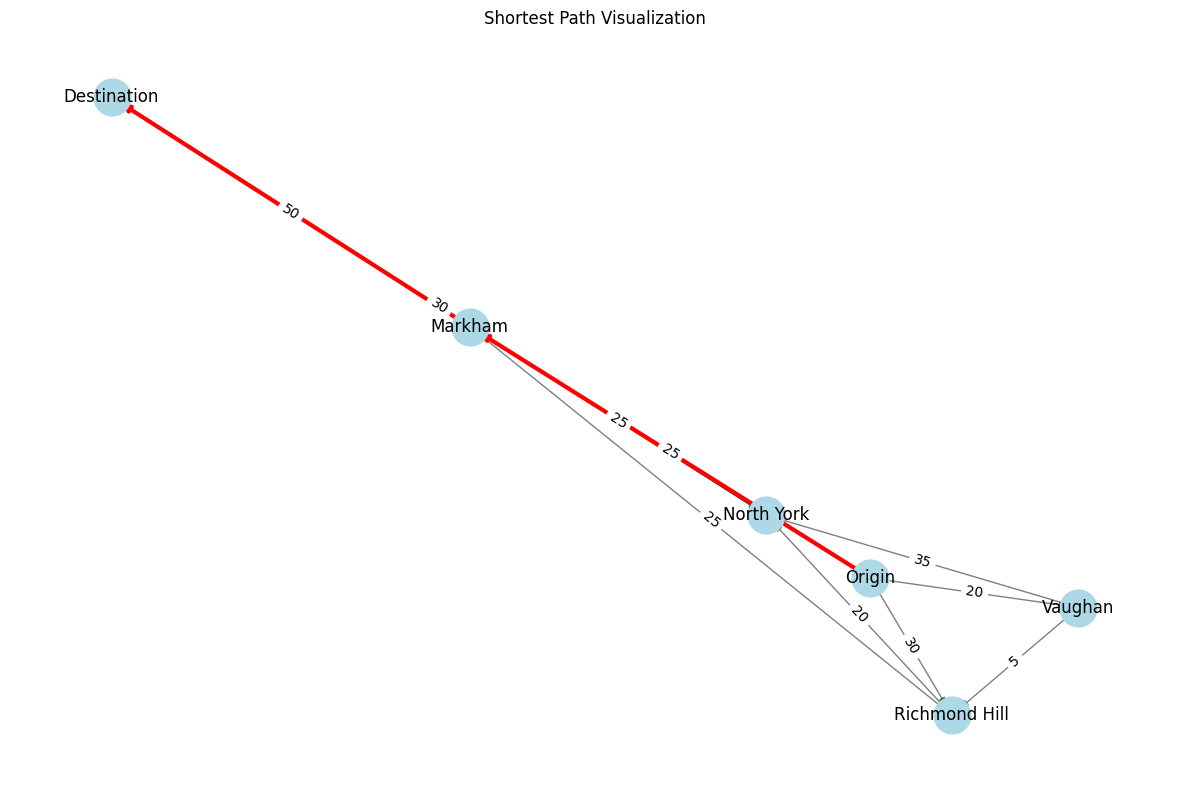

In [2]:
# Define the graph based on the distance table
graph = {
    'Origin': {'Vaughan': 20, 'Richmond Hill': 30, 'Markham': 25},
    'Vaughan': {'Richmond Hill': 5, 'North York': 35},
    'Richmond Hill': {'Markham': 25, 'North York': 20},
    'Markham': {'North York': 25, 'Destination': 50},
    'North York': {'Destination': 30},
    'Destination': {}  # Destination has no outgoing connections
}

# Run the algorithm
shortest_path, total_distance, tracking = dijkstra_algorithm(graph, 'Origin', 'Destination')

# Print the results
print(f"Shortest Path: {' -> '.join(shortest_path)}")
print(f"Total Distance: {total_distance} km")

# Detailed results showing step-by-step calculation
print("\nDetailed Algorithm Steps:")
for i, step in enumerate(tracking):
    print(f"\nStep {i+1}:")
    print(f"Current Node: {step['current']}")
    print("Distances:", end=" ")
    for node, dist in step['distances'].items():
        dist_str = str(dist) if dist != float('infinity') else "∞"
        print(f"{node}: {dist_str}", end=", ")
    print("\nRemaining Unvisited Nodes:", ", ".join(step['unvisited']))

# Create a visualization of the graph and the shortest path
def visualize_graph(graph, shortest_path):
    import networkx as nx
    
    G = nx.DiGraph()
    
    # Add edges to the graph
    for source, destinations in graph.items():
        for dest, weight in destinations.items():
            G.add_edge(source, dest, weight=weight)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Get positions for the nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    
    # Draw all edges
    edges = G.edges()
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=1, alpha=0.5)
    
    # Highlight the shortest path
    shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, width=3, edge_color='r')
    
    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=12)
    
    # Draw edge weights
    edge_labels = {(source, dest): graph[source][dest] for source, destinations in graph.items() for dest in destinations}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    plt.title("Shortest Path Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Try to visualize if networkx is available
try:
    visualize_graph(graph, shortest_path)
except ImportError:
    print("\nNetworkX not installed. Skipping visualization.")

# part 2
### Define the Environment

In [3]:
import numpy as np

# States: 0 = J1 (<10 customers), 1 = J2 (10-20), 2 = J3 (>20)
states = [0, 1, 2]

# Actions: 0 = No Ad, 1 = Google Ad
actions = [0, 1]

# Rewards matrix: rewards[state][action]
rewards = np.array([
    [500, 400],    # J1: No Ad = 500, Ad = 500 - 100
    [1000, 900],   # J2
    [3000, 2900]   # J3
])

# Transition probabilities: trans[action][state][next_state]
trans = np.array([
    # Action 0: No Ad
    [
        [0.4, 0.6, 0.0],   # From J1
        [0.3, 0.4, 0.3],   # From J2
        [0.0, 0.6, 0.4]    # From J3
    ],
    # Action 1: Google Ad
    [
        [0.1, 0.9, 0.0],   # From J1
        [0.1, 0.6, 0.3],   # From J2
        [0.0, 0.35, 0.65]  # From J3
    ]
])


### Q1 

###  value iteration algorithm function

### Initialize the Parameter

In [4]:
gamma = 0.9                      # Discount factor
V = np.zeros(len(states))       # Initial value function
policy = np.zeros(len(states), dtype=int)  # Optimal action for each state
epsilon = 0.05                  # Convergence threshold (5% relative error)
iteration = 0

### Value Iteration Loop

In [5]:
while True:
    new_V = np.copy(V)
    
    for s in states:
        value_per_action = []
        for a in actions:
            expected_value = rewards[s][a]
            for s_prime in states:
                expected_value += gamma * trans[a][s][s_prime] * V[s_prime]
            value_per_action.append(expected_value)
        
        best_action = np.argmax(value_per_action)
        new_V[s] = value_per_action[best_action]
        policy[s] = best_action
    
    # Check 5% relative error for all states
    relative_errors = np.abs((new_V - V) / (V + 1e-6))  # Add small term to prevent divide by zero
    if np.all(relative_errors < 0.05):
        break

    V = new_V
    iteration += 1


### Results

In [6]:
print("Value Iteration Converged in", iteration, "iterations.\n")
print("Optimal Value Function:")
for i, val in enumerate(V):
    print(f"State J{i+1}: {val:.2f} CAD")

print("\nOptimal Policy (0 = No Ad, 1 = Ad):")
for i, act in enumerate(policy):
    action_str = "Advertise" if act == 1 else "No Ad"
    print(f"State J{i+1}: {action_str}")

Value Iteration Converged in 12 iterations.

Optimal Value Function:
State J1: 9930.37 CAD
State J2: 11266.06 CAD
State J3: 14361.23 CAD

Optimal Policy (0 = No Ad, 1 = Ad):
State J1: Advertise
State J2: Advertise
State J3: Advertise


#   q2

#### Initialize Parameters

In [55]:
gamma = 0.9
epsilon = 0.04  # 5% relative error
V = np.array([0.0, 0.0, 2000.0])
policy = np.zeros(len(states), dtype=int)
policy_stable = False
iteration = 0

#### Policy Iteration and Evaluation

In [56]:
while not policy_stable:
    # Policy Evaluation (with relative delta < 5%)
    while True:
        delta = 0
        old_V = np.copy(V)

        for s in states:
            a = policy[s]
            new_value = rewards[s][a]
            for s_prime in states:
                new_value += gamma * trans[a][s][s_prime] * old_V[s_prime]

            if old_V[s] != 0:
                relative_change = abs(new_value - old_V[s]) / abs(old_V[s])
            else:
                relative_change = float('inf')

            delta = max(delta, relative_change)
            V[s] = new_value

        if delta < epsilon:
            break

    # Policy Improvement
    policy_stable = True
    for s in states:
        old_action = policy[s]
        action_values = []
        for a in actions:
            expected_value = rewards[s][a]
            for s_prime in states:
                expected_value += gamma * trans[a][s][s_prime] * V[s_prime]
            action_values.append(expected_value)
        best_action = np.argmax(action_values)
        policy[s] = best_action
        if best_action != old_action:
            policy_stable = False

    iteration += 1

### Results  

In [57]:
print("Policy Iteration Converged in", iteration, "iterations.\n")
print("Optimal Value Function:")
for i, val in enumerate(V):
    print(f"State J{i+1}: {val:.2f} CAD")
print("\nOptimal Policy (0 = No Ad, 1 = Ad):")
for i, act in enumerate(policy):
    action_str = "Advertise" if act == 1 else "No Ad"
    print(f"State J{i+1}: {action_str}")

Policy Iteration Converged in 2 iterations.

Optimal Value Function:
State J1: 10414.58 CAD
State J2: 11609.32 CAD
State J3: 14180.29 CAD

Optimal Policy (0 = No Ad, 1 = Ad):
State J1: Advertise
State J2: Advertise
State J3: Advertise
